In [116]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens

def stemming(text):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    #create stemmer
    stemmer = StemmerFactory().create_stemmer()
    #stemming process
    output = stemmer.stem(text)
    return output


def stemming_sentence(text):
    output = ""
    for token in tokenisasi(text):
        output = output + stemming(token) + " "
    return output[:-1]

doc_dict_raw = {}
doc_dict_raw['doc1'] = "pengembangan sistem informasi penjadwalan"
doc_dict_raw['doc2'] = "pengembangan model analisis sentimen berita"
doc_dict_raw['doc3'] = "analisis sistem input output"
doc_dict_raw['doc4'] = "pengembangan sistem informasi akademik universitas"
doc_dict_raw['doc5'] = "pengembangan sistem cari berita ekonomi"
doc_dict_raw['doc6'] = "analisis sistem neraca nasional"
doc_dict_raw['doc7'] = "pengembangan sistem informasi layanan statistik"
doc_dict_raw['doc8'] = "pengembangan sistem pencarian skripsi di universitas"
doc_dict_raw['doc9'] = "analisis sentimen publik terhadap pemerintah"
doc_dict_raw['doc10'] = "pengembangan model klasifikasi sentimen berita"

doc_dict = {}
for doc_id, doc in doc_dict_raw.items():
    doc_dict[doc_id] = stemming_sentence(doc)
print(doc_dict)





{'doc1': 'kembang sistem informasi jadwal', 'doc2': 'kembang model analisis sentimen berita', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas', 'doc9': 'analisis sentimen publik hadap perintah', 'doc10': 'kembang model klasifikasi sentimen berita'}


In [117]:
vocab = []

inverted_index = {}

for doc_id, doc in doc_dict.items():
    for token in tokenisasi(doc):
        print(token)
        if token not in vocab:
            vocab.append(token)
            inverted_index[token] = []
        if token in inverted_index:
            if doc_id not in inverted_index[token]:
                inverted_index[token].append(doc_id)
print(vocab)
print(inverted_index)

kembang
sistem
informasi
jadwal
kembang
model
analisis
sentimen
berita
analisis
sistem
input
output
kembang
sistem
informasi
akademik
universitas
kembang
sistem
cari
berita
ekonomi
analisis
sistem
neraca
nasional
kembang
sistem
informasi
layan
statistik
kembang
sistem
cari
skripsi
di
universitas
analisis
sentimen
publik
hadap
perintah
kembang
model
klasifikasi
sentimen
berita
['kembang', 'sistem', 'informasi', 'jadwal', 'model', 'analisis', 'sentimen', 'berita', 'input', 'output', 'akademik', 'universitas', 'cari', 'ekonomi', 'neraca', 'nasional', 'layan', 'statistik', 'skripsi', 'di', 'publik', 'hadap', 'perintah', 'klasifikasi']
{'kembang': ['doc1', 'doc2', 'doc4', 'doc5', 'doc7', 'doc8', 'doc10'], 'sistem': ['doc1', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8'], 'informasi': ['doc1', 'doc4', 'doc7'], 'jadwal': ['doc1'], 'model': ['doc2', 'doc10'], 'analisis': ['doc2', 'doc3', 'doc6', 'doc9'], 'sentimen': ['doc2', 'doc9', 'doc10'], 'berita': ['doc2', 'doc5', 'doc10'], 'input': ['do

# EXACT TOP K Document Retrieval

In [126]:
#Untuk penghitungan apakah terdapat kata di query yang terdapat di inverted index

query = "sistem informasi statistik"
def termFrequency(vocab, query):
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return tf_query

tf_query = termFrequency(vocab,query)

print(tf_query)

{'kembang': 0, 'sistem': 1, 'informasi': 1, 'jadwal': 0, 'model': 0, 'analisis': 0, 'sentimen': 0, 'berita': 0, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 1, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}


In [130]:
def wordDocFre(vocab, doc_dict):
    df = {}
    for word in vocab:
        frq = 0
        for doc in doc_dict.values():
            if word in tokenisasi(doc):
                frq = frq + 1
        df[word] = frq
    return df

import numpy as np

def inverseDocFre(vocab, doc_fre,length):
    idf = {}
    for word in vocab:
        idf[word] = idf[word] = 1+ np.log10((length + 1)/(doc_fre[word]+1))
    return idf

def termFrequencyInDoc(vocab, doc_dict):
    tf_docs = {}
    for doc_id in doc_dict.keys():
        tf_docs[doc_id] = {}
    for word in vocab:
        for doc_id,doc in doc_dict.items():
            tf_docs[doc_id][word] = doc.count(word)
    return tf_docs

def tfidf(vocab, tf, idf_scr, doc_dict):
    tf_idf_scr = {}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id] = {}
    for word in vocab:
        for doc_id,doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word] * idf_scr[word]
    return tf_idf_scr


tf_idf = tfidf(vocab, termFrequencyInDoc(vocab, doc_dict), inverseDocFre(vocab, wordDocFre(vocab, doc_dict),len(doc_dict)), doc_dict)
print(tf_idf)


{'doc1': {'kembang': 1.1383026981662814, 'sistem': 1.1383026981662814, 'informasi': 1.4393326938302626, 'jadwal': 1.7403626894942439, 'model': 0.0, 'analisis': 0.0, 'sentimen': 0.0, 'berita': 0.0, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc2': {'kembang': 1.1383026981662814, 'sistem': 0.0, 'informasi': 0.0, 'jadwal': 0.0, 'model': 1.5642714304385625, 'analisis': 1.3424226808222062, 'sentimen': 1.4393326938302626, 'berita': 1.4393326938302626, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc3': {'kembang': 0.0, 'sistem': 1.1383026981662814, 'informasi': 0.0, 'jadwal': 0.0

In [120]:

# Term - Document, Matrix

TD = np.zeros((len(vocab),len(doc_dict)))
for word in vocab:
    for doc_id, doc in tf_idf.items():
        ind1 = vocab.index(word)
        ind2 = list(tf_idf.keys()).index(doc_id)
        TD[ind1][ind2] = tf_idf[doc_id][word]
print(TD)
print(len(TD))

[[1.1383027  1.1383027  0.         1.1383027  1.1383027  0.
  1.1383027  1.1383027  0.         1.1383027 ]
 [1.1383027  0.         1.1383027  1.1383027  1.1383027  1.1383027
  1.1383027  1.1383027  0.         0.        ]
 [1.43933269 0.         0.         1.43933269 0.         0.
  1.43933269 0.         0.         0.        ]
 [1.74036269 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.56427143 0.         0.         0.         0.
  0.         0.         0.         1.56427143]
 [0.         1.34242268 1.34242268 0.         0.         1.34242268
  0.         0.         1.34242268 0.        ]
 [0.         1.43933269 0.         0.         0.         0.
  0.         0.         1.43933269 1.43933269]
 [0.         1.43933269 0.         0.         1.43933269 0.
  0.         0.         0.         1.43933269]
 [0.         0.         1.74036269 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.       

In [121]:
#Term - Query Matrix
import numpy as np

idf = inverseDocFre(vocab, wordDocFre(vocab, doc_dict),len(doc_dict))


TQ = np.zeros((len(vocab),1)) #hanya 1 query
for word in vocab:
    ind1 = vocab.index(word)
    TQ[ind1][0] = tf_query[word]*idf[word]
print(TQ)
print(len(TQ))

[[0.        ]
 [1.1383027 ]
 [1.43933269]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.74036269]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
24


In [123]:
#COSINE SIMILARITY

import math
def cosine_sim(vec1, vec2):
    vec1 = list(vec1)
    vec2 = list(vec2)
    dot_prod = 0
    for i, v in enumerate (vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    
    return dot_prod / (mag_1*mag_2)


In [86]:
print(cosine_sim(TQ[:, 0], TD[:, 0])) #query & doc1
print(cosine_sim(TQ[:, 0], TD[:, 1])) #query & doc2
print(cosine_sim(TQ[:, 0], TD[:, 2])) #query & doc3

0.480079152100338
0.0
0.16932053623985205


In [87]:
from collections import OrderedDict
def exact_top_k(doc_dict, TD, q, k):
    relevance_scores = {}
    i = 0
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:, i])
        i = i+1
    sorted_value = OrderedDict(sorted(relevance_scores.items(), key = lambda x: x[1], reverse = True))
    top_k = {j: sorted_value[j] for j in list(sorted_value)[:k]}
    return top_k

top_2 = exact_top_k(doc_dict, TD, TQ[:, 0], 2)


In [88]:
top_3 = exact_top_k(doc_dict, TD, TQ[:, 0], 3)
top_3

{'doc7': 0.7724111379389828,
 'doc1': 0.480079152100338,
 'doc4': 0.41815389455319024}

### Inexact Top K Document Retrieval (Scoring)
#### ELIMINASI QUERY

In [89]:
def index_elim_simple(query, doc_dict):
    remove_list =[]
    for doc_id,doc in doc_dict.items():
        n = 0
        for word in tokenisasi(query):
            if stemming(word) in doc:
                n = n+1
        if n==0:
            remove_list.append(doc_id)
    for key in remove_list:
        del doc_dict[key]
    return doc_dict

In [132]:
query = "sistem informasi statistik"
doc_dicts = index_elim_simple(query, doc_dict)
print(doc_dicts)

{'doc1': 'kembang sistem informasi jadwal', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas'}


In [133]:
def elim_query(query, idf_dict, idf_scores):
    for term in tokenisasi(query):
        if idf_dict[stemming(term)] < idf_scores:
            query = query.replace(term+" ", "")
            query = query.replace(term, "")
    return query

In [92]:
query = "sistem informasi statistik"
query = elim_query(query, idf, 1.5)
print(query)

statistik


# Champion List

In [134]:
def create_championlist(inverted_index, tf_idf, r):
    champion_list = {}
    for term in inverted_index.keys():
        weight_scores = {}
        for doc_id,tf in tf_idf.items():
            if tf_idf[doc_id][term]!=0:
                weight_scores[doc_id] = tf_idf[doc_id][term]
                sorted_value = OrderedDict(sorted(weight_scores.items(), key=lambda x: x[1], reverse = True))
                top_r = {j: sorted_value[j] for j in list(sorted_value)[:r]}
                champion_list[term]=list(top_r.keys())
    return champion_list

In [94]:
r = 2
create_championlist(inverted_index, tf_idf, r)

{'kembang': ['doc1', 'doc2'],
 'sistem': ['doc1', 'doc3'],
 'informasi': ['doc1', 'doc4'],
 'jadwal': ['doc1'],
 'model': ['doc2', 'doc10'],
 'analisis': ['doc2', 'doc3'],
 'sentimen': ['doc2', 'doc9'],
 'berita': ['doc2', 'doc5'],
 'input': ['doc3'],
 'output': ['doc3'],
 'akademik': ['doc4'],
 'universitas': ['doc4', 'doc8'],
 'cari': ['doc5', 'doc8'],
 'ekonomi': ['doc5'],
 'neraca': ['doc6'],
 'nasional': ['doc6'],
 'layan': ['doc7'],
 'statistik': ['doc7'],
 'skripsi': ['doc8'],
 'di': ['doc8'],
 'publik': ['doc9'],
 'hadap': ['doc9'],
 'perintah': ['doc9'],
 'klasifikasi': ['doc10']}

# PERT 7

In [95]:
!pip install -U scikit-learn

In [96]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [136]:
rel_vecs_id = ["doc1", "doc4", "doc5", "doc7", "doc8"]
nrel_vecs_id = ["doc2", "doc3", "doc6", "doc9", "doc10"]

rel_vecs = []
for doc in rel_vecs_id:
    rel_vecs.append(DT[doc_ids.index(doc),:])
nrel_vecs = []
for doc in nrel_vecs_id:
    nrel_vecs.append(DT[doc_ids.index(doc),:])    

ValueError: 'doc2' is not in list

[[1.1383027  1.1383027  1.43933269 1.74036269 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.1383027  0.         0.         0.         1.56427143 1.34242268
  1.43933269 1.43933269 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.1383027  0.         0.         0.         1.34242268
  0.         0.         1.74036269 1.74036269 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.1383027  1.1383027  1.43933269 0.         0.         0.
  0.         0.         0.         0.         1.74036269 1.56427143
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0. 

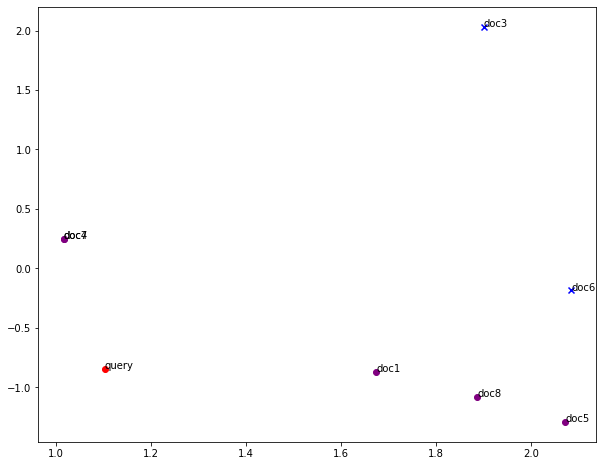

In [99]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

DT = TD.transpose()
print (DT)
model = TruncatedSVD(n_components=2, random_state=7).fit(DT)
DT_reduced = model.transform(DT)
QT_reduced = model.transform(TQ.transpose())
print (QT_reduced)
print (DT_reduced)

plt.figure(figsize=(10, 8))
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color=["red"])
doc_ids=list(doc_dict.keys())
for i, txt in enumerate (doc_ids):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i, 1]))
    if txt in rel_vecs_id:
        plt.scatter(DT_reduced[i, 0], DT_reduced[i, 1], marker='o', color=['purple'])
    elif txt in nrel_vecs_id:
        plt.scatter(DT_reduced[i, 0], DT_reduced[i, 1], marker='x', color=['blue'])
plt.annotate("query", (QT_reduced[0, 0], QT_reduced[0, 1]))
plt.show()

In [78]:
top_5 = exact_top_k(doc_dict, TD, TQ[:,], 5)
print(top_5)

{'doc8': array([0.77241114]), 'doc1': array([0.48007915]), 'doc5': array([0.41815389]), 'doc4': array([0.16932054]), 'doc7': array([0.16932054])}


In [143]:
import numpy as np
query_vecs = TQ.transpose()
alpha = 1
beta = 0.75
gamma = 0.15

# Update query vector with Rocchio algorithm
query_vecs = alpha * query_vecs + beta * np.mean(rel_vecs, axis=0) - gamma * np.mean(nrel_vecs, axis=0)
query_vecs[query_vecs < 0] = 0

print(TQ)
print(query_vecs)

[[0.        ]
 [1.1383027 ]
 [1.43933269]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [1.74036269]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]
[[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
  nan nan nan nan nan nan]]


In [139]:
top_5 = exact_top_k(doc_dict, TD, query_vecs[0, :].transpose(), 5)
print(top_5)

{'doc1': nan, 'doc3': nan, 'doc4': nan, 'doc5': nan, 'doc6': nan}


In [140]:
QT1_reduced = model.transform(query_vecs)

plt.figure(figsize=(10, 8))
plt.scatter(QT_reduced[:,0], QT_reduced[:,1], color=["red"])
plt.scatter(QT1_reduced[:,0], QT1_reduced[:,1], color=["green"])
doc_ids=list(doc_dict.keys())
for i, txt in enumerate (doc_ids):
    plt.annotate(txt,(DT_reduced[i,0], DT_reduced[i,1]))
    if txt in rel_vecs_id:
        plt.scatter(DT_reduced[i,0], DT_reduced[i,1], marker='o', color=["purple"])
    elif txt in nrel_vecs_id:
        plt.scatter(DT_reduced[i,0], DT_reduced[i,1], marker='x', color=["blue"])
#plt.legend()
plt.annotate("query",(QT_reduced[0,0], QT_reduced[0,1]))
plt.annotate("new query",(QT1_reduced[:,0], QT1_reduced[:, 1]))

ValueError: Input X contains NaN.
TruncatedSVD does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [100]:
import nltk
nltk.donwload('wordnet')
nltk.donwload('omw-1.4')

ModuleNotFoundError: No module named 'nltk'